In [2]:
# Schritt 1: Laden der notwendigen Bibliotheken
import pandas as pd

# Schritt 2: Einlesen des Datensatzes mit Semikolon als Trennzeichen
# Da der Datensatz mit Semikolon (;) getrennt ist, geben wir das explizit über das Argument 'sep' an.
df = pd.read_csv('measures.csv', sep=';', decimal=',')

# Wir lassen uns die ersten fünf Zeilen anzeigen, um einen ersten Eindruck vom Aufbau zu bekommen.
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING


In [3]:
# Schritt 3: Wir schauen ob es Spalten gibt die nicht den Datentyp 'float64' entsprechen.

non_float_columns = df.select_dtypes(exclude=['float64']).columns
print(non_float_columns)

Index(['activity'], dtype='object')


In [4]:
# Schritt 4: Überprüfung auf fehlende Werte im Datensatz

# Wir zählen alle NaN-Werte pro Spalte.
# Fehlende Werte können auf Probleme bei der Messung, Speicherung oder Verarbeitung hinweisen
# und sollten vor dem Training eines Modells behandelt werden.
missing_values = df.isnull().sum()

# Wir filtern auf Spalten, die tatsächlich fehlende Werte enthalten
missing_values = missing_values[missing_values > 0]

# Ausgabe der betroffenen Spalten (falls vorhanden)
print("Spalten mit fehlenden Werten:")
print(missing_values if not missing_values.empty else "Keine fehlenden Werte gefunden.")

Spalten mit fehlenden Werten:
Keine fehlenden Werte gefunden.


In [5]:
# Schritt 5: Überprüfung auf Ausreißer außerhalb des normierten Bereichs [-1, 1]

# Zuerst filtern wir nur die numerischen Spalten heraus (ohne z. B. 'subject' oder 'activity')
numerical_df = df.iloc[:, :-2]

# Prüfen, ob irgendwo Werte < -1 vorkommen
under_min = (numerical_df < -1).sum()
under_min = under_min[under_min > 0]

# Prüfen, ob irgendwo Werte > 1 vorkommen
over_max = (numerical_df > 1).sum()
over_max = over_max[over_max > 0]

# Ausgabe der Ergebnisse
print("Spalten mit Werten < -1:")
print(under_min if not under_min.empty else "Keine Werte kleiner -1 gefunden.")

print("\nSpalten mit Werten > 1:")
print(over_max if not over_max.empty else "Keine Werte größer 1 gefunden.")


Spalten mit Werten < -1:
Keine Werte kleiner -1 gefunden.

Spalten mit Werten > 1:
Keine Werte größer 1 gefunden.


In [6]:
# Schritt 6: Überprüfung auf doppelte Datensätze

# Wir suchen nach vollständig identischen Zeilen im gesamten DataFrame – 
# also Duplikate über alle Spalten hinweg (inkl. subject und activity).
# Das ist wichtig, weil Duplikate das Modell verzerren können,
# z. B. durch zu hohe Gewichtung bestimmter Muster.
duplicate_rows = df[df.duplicated()]

# Ausgabe der Anzahl und optional auch eine Vorschau der Duplikate
print(f"Anzahl vollständig doppelter Zeilen im Datensatz: {duplicate_rows.shape[0]}")

# Optional: erste doppelte Zeilen anzeigen
if not duplicate_rows.empty:
    display(duplicate_rows.head())
else:
    print("Keine doppelten Zeilen gefunden.")

# Schritt 6.1: Doppelte Zeilen ohne Rücksicht auf 'subject' und 'activity'
# Wir ignorieren dazu die letzten beiden Spalten (subject, activity).
feature_columns = df.columns[:-2]
duplicate_features_only = df[df.duplicated(subset=feature_columns)]

print(f"\nAnzahl doppelter Zeilen bezogen nur auf die Messwerte (ohne subject und activity): {duplicate_features_only.shape[0]}")

if not duplicate_features_only.empty:
    display(duplicate_features_only.head())
else:
    print("Keine doppelten Messzeilen gefunden (unabhängig von subject und activity).")


Anzahl vollständig doppelter Zeilen im Datensatz: 0
Keine doppelten Zeilen gefunden.

Anzahl doppelter Zeilen bezogen nur auf die Messwerte (ohne subject und activity): 0
Keine doppelten Messzeilen gefunden (unabhängig von subject und activity).


In [7]:
# Schritt 7: Suche und Entfernung doppelter Feature-Spalten (identische Inhalte),
# inkl. Übersichtstabelle zur manuellen Prüfung

print(f"Anzahl Spalten vor Entfernen der Duplikate: {df.shape[1]}")

# Initialisieren
duplicate_feature_columns = set()
duplicate_pairs = []
columns = df.columns

# Vergleich jeder Spalte mit jeder anderen
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        
        if df[col1].equals(df[col2]):
            duplicate_feature_columns.add(col2)  # col2 wird als Duplikat markiert
            duplicate_pairs.append((col1, col2))  # Speichern für Übersichtstabelle

# Übersicht über identische Spaltenpaare
duplicates_df = pd.DataFrame(duplicate_pairs, columns=['Spalte_1', 'Spalte_2'])

print(f"Anzahl identischer Spaltenpaare: {len(duplicates_df)}")
if not duplicates_df.empty:
    display(duplicates_df)
else:
    print("Keine identischen Spalten gefunden.")

# Entfernen der Duplikate aus dem DataFrame
df_cleaned = df.drop(columns=duplicate_feature_columns)

print(f"Neue Anzahl Spalten nach Entfernen der Duplikate: {df_cleaned.shape[1]}")

# Schritt 7.1: Anzeige der entfernten Spaltennamen
removed_columns = sorted(list(duplicate_feature_columns))
print(f"\nListe der entfernten Spalten ({len(removed_columns)}):")
for col in removed_columns:
    print(f"- {col}")

Anzahl Spalten vor Entfernen der Duplikate: 563
Anzahl identischer Spaltenpaare: 24


,Spalte_1,Spalte_2
0,tBodyAccMag-mean(),tBodyAccMag-sma()
1,tBodyAccMag-mean(),tGravityAccMag-mean()
2,tBodyAccMag-mean(),tGravityAccMag-sma()
3,tBodyAccMag-std(),tGravityAccMag-std()
4,tBodyAccMag-mad(),tGravityAccMag-mad()
5,tBodyAccMag-max(),tGravityAccMag-max()
6,tBodyAccMag-min(),tGravityAccMag-min()
7,tBodyAccMag-sma(),tGravityAccMag-mean()
8,tBodyAccMag-sma(),tGravityAccMag-sma()
9,tBodyAccMag-energy(),tGravityAccMag-energy()


Neue Anzahl Spalten nach Entfernen der Duplikate: 542

Liste der entfernten Spalten (21):
- fBodyAccMag-sma()
- fBodyBodyAccJerkMag-sma()
- fBodyBodyGyroJerkMag-sma()
- fBodyBodyGyroMag-sma()
- tBodyAccJerkMag-sma()
- tBodyAccMag-sma()
- tBodyGyroJerkMag-sma()
- tBodyGyroMag-sma()
- tGravityAccMag-arCoeff()1
- tGravityAccMag-arCoeff()2
- tGravityAccMag-arCoeff()3
- tGravityAccMag-arCoeff()4
- tGravityAccMag-energy()
- tGravityAccMag-entropy()
- tGravityAccMag-iqr()
- tGravityAccMag-mad()
- tGravityAccMag-max()
- tGravityAccMag-mean()
- tGravityAccMag-min()
- tGravityAccMag-sma()
- tGravityAccMag-std()


In [8]:
# Schritt 8: Erkennen und Entfernen von konstanten oder nahezu konstanten Merkmalen

from sklearn.feature_selection import VarianceThreshold

# Achtung: Wir analysieren nur die numerischen Messwerte – z. B. ohne 'subject' und 'activity'
feature_data = df_cleaned.iloc[:, :-2]

# Schritt 8.1: Berechnung der Varianz jeder Spalte
# VarianceThreshold entfernt standardmäßig alle Features mit Varianz = 0 (konstant)
selector = VarianceThreshold(threshold=0.0)
selector.fit(feature_data)

# Finden der konstanten Spalten
constant_columns = feature_data.columns[~selector.get_support()]

print(f"Anzahl konstanter Merkmale (Varianz = 0): {len(constant_columns)}")
if len(constant_columns) > 0:
    print("Konstante Merkmale:")
    print(list(constant_columns))

# Schritt 8.2: Finden von Merkmalen mit sehr geringer Varianz (z. B. < 0.001)
# Hinweis: Da alle Features auf [-1, 1] normiert sind, gilt 0.001 als konservative Schwelle für "nahezu konstante" Merkmale.
low_variance_threshold = 0.001
low_var_selector = VarianceThreshold(threshold=low_variance_threshold)
low_var_selector.fit(feature_data)

# Finden der Merkmale mit Varianz unterhalb der Schwelle
low_variance_columns = feature_data.columns[~low_var_selector.get_support()]

print(f"\nAnzahl Merkmale mit Varianz < {low_variance_threshold}: {len(low_variance_columns)}")
if len(low_variance_columns) > 0:
    print("Niedrig-Varianz-Merkmale:")
    print(list(low_variance_columns))

# Schritt 8.3: Entfernen der konstanten und niedrig-varianten Merkmale aus dem DataFrame
columns_to_remove = set(constant_columns).union(set(low_variance_columns))
df_cleaned2 = df_cleaned.drop(columns=columns_to_remove)

print(f"\nNeue Anzahl Merkmale nach Entfernung: {df_cleaned2.shape[1]}")

Anzahl konstanter Merkmale (Varianz = 0): 0

Anzahl Merkmale mit Varianz < 0.001: 0

Neue Anzahl Merkmale nach Entfernung: 542


In [9]:
# Schritt 9: Prüfung auf inkonsistente oder fehlerhafte Klassen in 'activity'

# Wir prüfen, ob alle Aktivitätsbezeichnungen konsistent geschrieben sind
# z. B. keine Tippfehler, keine überflüssigen Leerzeichen oder uneinheitliche Groß-/Kleinschreibung
# Das ist wichtig für korrekte Klassifikation und One-Hot-Encoding später

unique_activities = df_cleaned2['activity'].unique()
print("Einzigartige Aktivitäten in 'activity':")
print(unique_activities)


Einzigartige Aktivitäten in 'activity':
['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


Verteilung der Zielklassen (activity):
activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


<Axes: title={'center': 'Klassenverteilung: activity'}, xlabel='activity'>

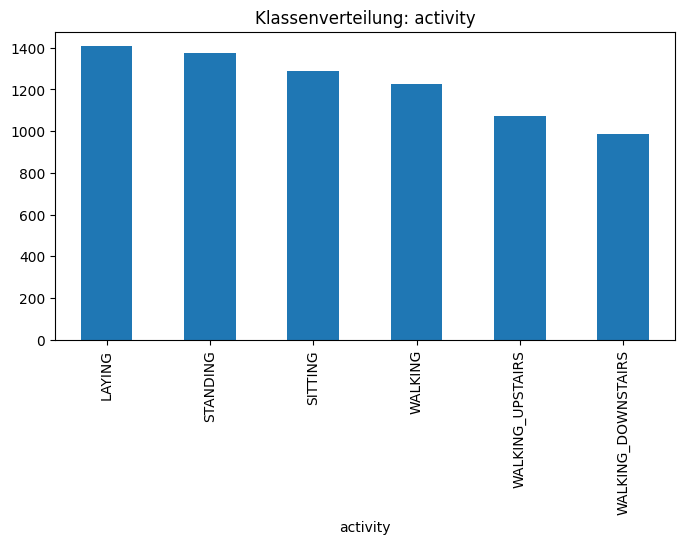

In [10]:
# Schritt 10: Prüfung auf Klassenbalance

# Wir analysieren, wie häufig jede Aktivität im Datensatz vorkommt
# Ein starkes Ungleichgewicht kann dazu führen, dass das Modell einzelne Klassen bevorzugt

activity_counts = df_cleaned2['activity'].value_counts()
print("Verteilung der Zielklassen (activity):")
print(activity_counts)

# Optional: Visualisierung
activity_counts.plot(kind='bar', title='Klassenverteilung: activity', figsize=(8, 4))

Anzahl Messungen pro Subjekt:
subject
1.0     347
3.0     341
5.0     302
6.0     325
7.0     308
8.0     281
11.0    316
14.0    323
15.0    328
16.0    366
17.0    368
19.0    360
21.0    408
22.0    321
23.0    372
25.0    409
26.0    392
27.0    376
28.0    382
29.0    344
30.0    383
Name: count, dtype: int64


<Axes: title={'center': 'Messverteilung pro Subjekt'}, xlabel='subject'>

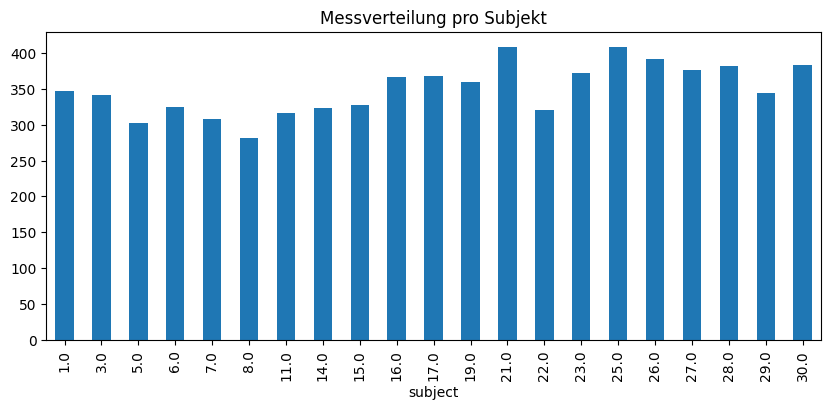

In [11]:
# Schritt 11: Analyse der Subjektverteilung

# Wir prüfen, wie viele Messungen es pro Person gibt
# Falls einige Subjekte sehr wenige oder extrem viele Werte haben,
# kann das Modell personenspezifisch verzerrt werden

subject_counts = df_cleaned2['subject'].value_counts().sort_index()
print("Anzahl Messungen pro Subjekt:")
print(subject_counts)

# Optional: Visualisierung
subject_counts.plot(kind='bar', title='Messverteilung pro Subjekt', figsize=(10, 4))

In [12]:
# Schritt 13: Finden von Features mit nur wenigen unterschiedlichen Werten

# Wir zählen die Anzahl eindeutiger Werte pro Feature.
# Merkmale mit z. B. nur 1–2 Werten sind oft wenig informativ (wie binär, konstant)
# und können entfernt oder speziell behandelt werden.

unique_value_counts = df_cleaned2.iloc[:, :-2].nunique()  # exclude subject + activity
low_info_features = unique_value_counts[unique_value_counts <= 2]

print(f"Anzahl Features mit ≤ 2 eindeutigen Werten: {len(low_info_features)}")
if not low_info_features.empty:
    print("Betroffene Spalten:")
    print(low_info_features)


Anzahl Features mit ≤ 2 eindeutigen Werten: 0


# Modell

In [13]:
from sklearn.preprocessing import StandardScaler

# Wir entfernen die Zielvariablen und IDs für das Scaling
X_features = df_cleaned2.drop(columns=['activity', 'subject'])
y = df_cleaned2['activity']
subject = df_cleaned2['subject']

# Reskalierung auf Mittelwert = 0 und Standardabweichung = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)


In [14]:
from sklearn.model_selection import train_test_split

# Kombinierte Hilfsvariable für gleichzeitige Stratifizierung nach Subjekt und Aktivität
stratify_key = df_cleaned2['subject'].astype(str) + '_' + df_cleaned2['activity']

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=stratify_key)

print(f"Trainingsdaten: {X_train.shape}, Testdaten: {X_test.shape}")


Trainingsdaten: (5881, 540), Testdaten: (1471, 540)


In [ ]:
# -------------------------------------------------------
# 0 | Imports
# -------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import (
    train_test_split, GridSearchCV, StratifiedKFold
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

RND        = 42
CV_SPLITS  = 5

# -------------------------------------------------------
# 1 | Stage-1-Label & Split
# -------------------------------------------------------
y_stage1 = y.apply(lambda x: 'bewegung' if 'WALKING' in x else 'ruhe')
stratify_stage1 = subject.astype(str) + '_' + y_stage1

X_tr, X_te, y1_tr, y1_te, yfull_tr, yfull_te = train_test_split(
    X_scaled, y_stage1, y, test_size=0.2, random_state=RND, stratify=stratify_stage1
)

# -------------------------------------------------------
# 2 | GridSearch STAGE 1
# -------------------------------------------------------
cv1 = StratifiedKFold(n_splits=CV_SPLITS, shuffle=True, random_state=RND)

stage1_candidates = [
    ('rf',  RandomForestClassifier(random_state=RND), {
        'n_estimators': [200, 400],
        'max_depth':    [None, 20],
        'class_weight': ['balanced']
    }),
    ('svm', SVC(kernel='rbf', random_state=RND), {
        'C':     [1, 10, 100],
        'gamma': ['scale', 0.01, 0.001]
    }),
    ('lr',   LogisticRegression(max_iter=2000, solver='lbfgs', n_jobs=-1, random_state=RND), {
        'C': [0.1, 1, 10]
    })
]

best_score_stage1 = -np.inf
for name, est, param_grid in stage1_candidates:
    gs = GridSearchCV(est, param_grid, cv=cv1, scoring='accuracy',
                      n_jobs=-1, verbose=0, refit=True)
    gs.fit(X_tr, y1_tr)
    print(f"[Stage 1] {name}  • best CV acc = {gs.best_score_:.4f}")
    print(f"          best params → {gs.best_params_}\n")
    if gs.best_score_ > best_score_stage1:
        best_score_stage1 = gs.best_score_
        clf_stage1        = gs.best_estimator_
        stage1_name       = name
        stage1_params     = gs.best_params_

print(f"=> Stage 1 gewählt: {stage1_name}  ({best_score_stage1:.4f})")
print(f"   Hyperparameter: {stage1_params}\n")

y1_pred = clf_stage1.predict(X_te)
print("Stage 1 – Bewegung vs. Ruhe")
print(classification_report(y1_te, y1_pred, digits=4))

# -------------------------------------------------------
# 3 | Daten für Stage 2
# -------------------------------------------------------
ruhe_idx, bewegung_idx = np.where(y1_pred == 'ruhe')[0], np.where(y1_pred == 'bewegung')[0]

X_te_df = pd.DataFrame(X_te)
X_te_ruhe, y_te_ruhe         = X_te_df.iloc[ruhe_idx],      yfull_te.iloc[ruhe_idx]
X_te_bewegung, y_te_bewegung = X_te_df.iloc[bewegung_idx],  yfull_te.iloc[bewegung_idx]

ruhe_labels      = ['LAYING', 'SITTING', 'STANDING']
bewegung_labels  = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']

X_tr_ruhe, y_tr_ruhe         = X_tr[yfull_tr.isin(ruhe_labels)],      yfull_tr[yfull_tr.isin(ruhe_labels)]
X_tr_bewegung, y_tr_bewegung = X_tr[yfull_tr.isin(bewegung_labels)],  yfull_tr[yfull_tr.isin(bewegung_labels)]

# -------------------------------------------------------
# 4 | GridSearch STAGE 2a  (Ruhe)
# -------------------------------------------------------
cv2a = StratifiedKFold(n_splits=CV_SPLITS, shuffle=True, random_state=RND)

stage2a_grid = [
    ('rf', RandomForestClassifier(random_state=RND), {
        'n_estimators': [200, 400],
        'max_depth':    [None, 15]
    }),
    ('gb', GradientBoostingClassifier(random_state=RND), {
        'n_estimators':   [100, 200],
        'learning_rate':  [0.1, 0.05],
        'max_depth':      [2, 3]
    })
]

best_score_2a = -np.inf
for name, est, param_grid in stage2a_grid:
    gs = GridSearchCV(est, param_grid, cv=cv2a, scoring='accuracy',
                      n_jobs=-1, verbose=0, refit=True)
    gs.fit(X_tr_ruhe, y_tr_ruhe)
    print(f"[Stage 2a] {name} • best CV acc = {gs.best_score_:.4f}")
    print(f"           best params → {gs.best_params_}\n")
    if gs.best_score_ > best_score_2a:
        best_score_2a       = gs.best_score_
        clf_stage2_ruhend   = gs.best_estimator_
        stage2a_name        = name
        stage2a_params      = gs.best_params_

print(f"=> Stage 2a gewählt: {stage2a_name}  ({best_score_2a:.4f})")
print(f"   Hyperparameter: {stage2a_params}\n")

y_pred_ruhe = clf_stage2_ruhend.predict(X_te_ruhe)
print("Stage 2a – Ruhe-Feinklassen")
print(classification_report(y_te_ruhe, y_pred_ruhe, digits=4))

# -------------------------------------------------------
# 5 | GridSearch STAGE 2b  (Bewegung)
# -------------------------------------------------------
cv2b = StratifiedKFold(n_splits=CV_SPLITS, shuffle=True, random_state=RND)

stage2b_grid = [
    ('rf', RandomForestClassifier(random_state=RND), {
        'n_estimators': [200, 400],
        'max_depth':    [None, 15]
    }),
    ('gb', GradientBoostingClassifier(random_state=RND), {
        'n_estimators':  [100, 200],
        'learning_rate': [0.1, 0.05],
        'max_depth':     [2, 3]
    })
]

best_score_2b = -np.inf
for name, est, param_grid in stage2b_grid:
    gs = GridSearchCV(est, param_grid, cv=cv2b, scoring='accuracy',
                      n_jobs=-1, verbose=0, refit=True)
    gs.fit(X_tr_bewegung, y_tr_bewegung)
    print(f"[Stage 2b] {name} • best CV acc = {gs.best_score_:.4f}")
    print(f"           best params → {gs.best_params_}\n")
    if gs.best_score_ > best_score_2b:
        best_score_2b        = gs.best_score_
        clf_stage2_bewegung  = gs.best_estimator_
        stage2b_name         = name
        stage2b_params       = gs.best_params_

print(f"=> Stage 2b gewählt: {stage2b_name}  ({best_score_2b:.4f})")
print(f"   Hyperparameter: {stage2b_params}\n")

y_pred_bewegung = clf_stage2_bewegung.predict(X_te_bewegung)
print("Stage 2b – Bewegungs-Feinklassen")
print(classification_report(y_te_bewegung, y_pred_bewegung, digits=4))

# -------------------------------------------------------
# 6 | End-to-End-Score
# -------------------------------------------------------
final_pred = pd.Series(index=yfull_te.index, dtype=object)
final_pred.iloc[ruhe_idx]      = y_pred_ruhe
final_pred.iloc[bewegung_idx]  = y_pred_bewegung

pipeline_test_score = accuracy_score(yfull_te, final_pred)

print("============================================================")
print(f"End-to-End-Accuracy: {pipeline_test_score:.4f}")
print("============================================================")
print("\n>>> Zusammenfassung der gewählten Modelle")
print(f"Stage 1 : {stage1_name}  → {stage1_params}")
print(f"Stage 2a: {stage2a_name} → {stage2a_params}")
print(f"Stage 2b: {stage2b_name} → {stage2b_params}")


[Stage 1] rf  best acc CV: 0.9998
[Stage 1] svm  best acc CV: 1.0000
[Stage 1] lr  best acc CV: 0.9998

=> Gewähltes Stage-1-Modell: svm (CV-Acc 1.0000)

Stage 1 – Bewegung vs. Ruhe
              precision    recall  f1-score   support

    bewegung     0.9985    1.0000    0.9992       656
        ruhe     1.0000    0.9988    0.9994       815

    accuracy                         0.9993      1471
   macro avg     0.9992    0.9994    0.9993      1471
weighted avg     0.9993    0.9993    0.9993      1471

[Stage 2a] rf  best acc CV: 0.9732


KeyboardInterrupt: 